# Assignment — Node centrality measures

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from typing import Dict, List
import warnings
warnings.filterwarnings("ignore")

В этом задании мы будем использовать набор данных станций Московского метрополитена, взятый из исследования Оптимального* полного маршрута Московского метрополитена. Давайте загрузим и посмотрим на данные.

In [2]:
station_url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/stations_data.txt'
routes_url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/routes_data.txt'

In [3]:
stations = pd.read_csv(station_url)
routes = pd.read_csv(routes_url)

In [4]:
stations.head()

,id,line_name,station_name,station_type,delay_morning,delay_rush,delay_night,lat,lon
0,0,Sokolnicheskaya,Bulvar Rokossovskogo,deadend,120,90,360,55.814269,37.735117
1,1,Sokolnicheskaya,Cherkizovskaya,pass,120,90,360,55.802991,37.744825
2,2,Sokolnicheskaya,Preobrazhenskaya ploschad,pass,120,90,360,55.796172,37.715022
3,3,Sokolnicheskaya,Sokolniki,pass,120,90,360,55.789200,37.679706
4,4,Sokolnicheskaya,Krasnoselskaya,pass,120,90,360,55.779853,37.666077


In [5]:
routes.head()

,id_from,id_to,route_type,delay
0,0,1,drive,120
1,1,0,drive,120
2,1,2,drive,240
3,2,1,drive,240
4,2,3,drive,180


# Задание 1. Метрограф (0 баллов)

Прежде чем приступить к анализу центральности, построим граф станций.

Напишите функцию metro_graph, которая берет наборы данных stations и routes и возвращает граф со всеми станциями и маршрутами любого типа. Labels of nodes находятся в столбце station.id. Nodes в средстве просмотра G.nodes должны располагаться в порядке возрастания. Все узлы должны иметь атрибуты station_name и line_name.

In [6]:
def metro_graph(stations: pd.DataFrame, routes: pd.DataFrame) -> nx.Graph:
    """
    Построить граф со станциями метро и маршрутами
    
    :param stations: кадр данных с описанием подземных станций (узлов), идентификатор столбца используется для 
    идентификатора узла в nx.Graph
    :param routes: edgelist для подземного графа. id_from — источник and id_to — is target nodes.
    :return: граф московского метро
    """
    # YOUR CODE HERE
    
    MetroM = nx.Graph()
    
    for i in range(len(stations['id'])):
        MetroM.add_node(stations['id'][i], 
                        **{'station_name' : stations['station_name'][i], 'line_name' : stations['line_name'][i]})
        
    for i in range(len(routes['id_from'])):
        MetroM.add_edge(routes['id_from'][i], routes['id_to'][i])
    
    plt.figure(figsize=(13, 7))
    nx.draw_networkx(MetroM)
    
    print(MetroM)
    
    return MetroM

Graph with 194 nodes and 228 edges


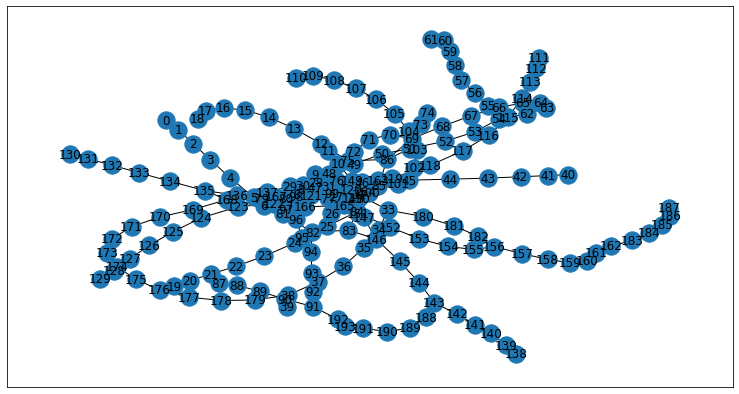

In [7]:
'''Проверить порядок узлов, количество узлов, названия станций и линий'''
G = metro_graph(stations, routes)
assert (np.array(list(G.nodes)) == np.arange(194)).sum() == 194
assert G.number_of_edges() == 228
assert G.nodes[100]['station_name'] == 'Shabolovskaya'
assert G.nodes[100]['line_name'] == 'Kaluzhsko-Rizhskaya'

Давайте нарисуем график с пружинным макетом по умолчанию.

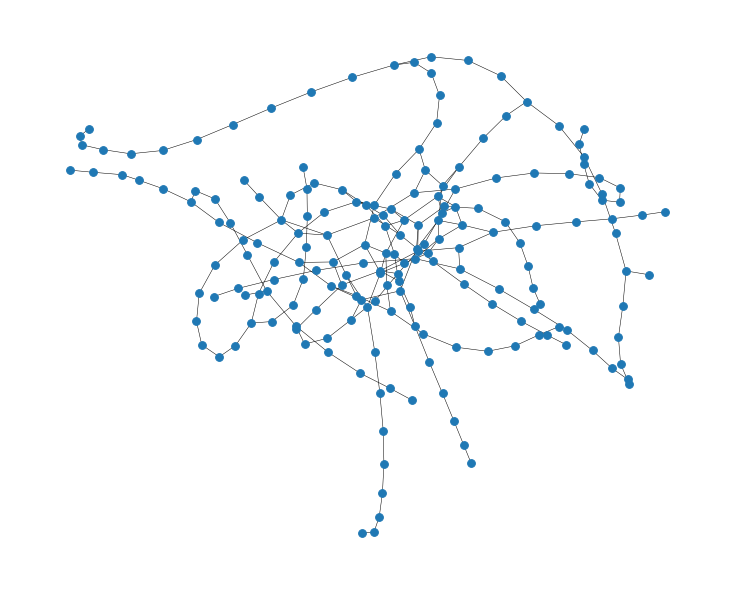

In [8]:
plt.figure(figsize=(10, 8))
nx.draw(G, 
        width=0.5,
        node_size=60)
plt.show()

Пока это не похоже на карту метро. Давайте укажем расположение на основе расстояния, используя информацию со станций набора данных.

Напишите функцию metro_layout, которая принимает stations набора данных и возвращает словарь с узлами в качестве ключей и позициями в качестве значений: 
- {node_id: [longitude, latitude]}

In [9]:
def metro_layout(stations: pd.DataFrame) -> Dict[int, List[float]]:
    """
    Построить макет метрографа на основе расстояния
    
    :param stations: кадр данных с описанием подземных станций (nodes), column id is используется для node id в nx.Graph.
        lat и lon — географические координаты станции.
    :return: гео макет московского метро
    """
    # YOUR CODE HERE
    MetroGeo = {}
    
    for i in stations['id']:
        MetroGeo[i] = ([stations['lon'][i], stations['lat'][i]])

    print(len(MetroGeo))
    
    return MetroGeo

In [10]:
'''Check a type and positions of some random nodes'''
pos = metro_layout(stations)
assert type(pos) == dict
assert len(pos) == 194
assert pos[100] == [37.6078018, 55.71882329]
assert pos[172] == [37.72840065, 55.69297728]

194


Давайте нарисуем график с макетом на основе расстояния.

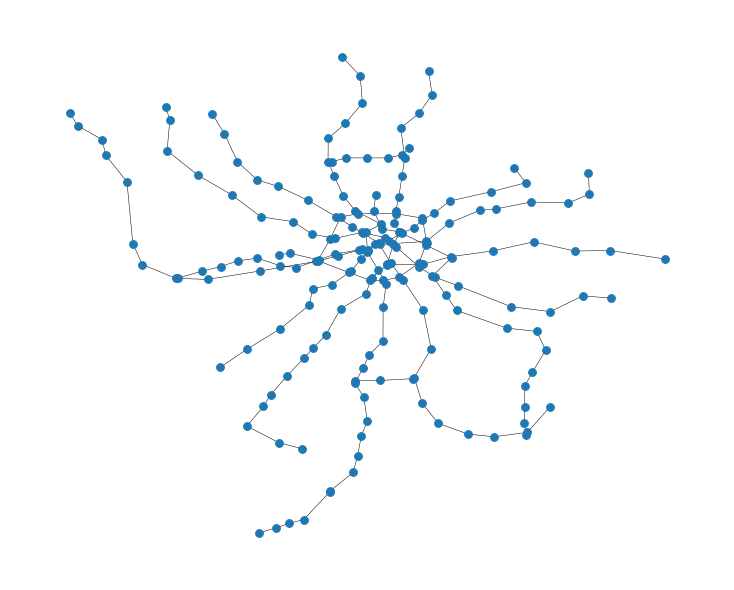

In [11]:
plt.figure(figsize=(10, 8))
nx.draw(G, 
        pos,
        width=0.5,
        node_size=60)
plt.show()

Последний шаг предварительной обработки, давайте раскрасим станции по их линиям.

Напишите функцию station_color, которая берет граф G и возвращает словарь с узлами в качестве ключей и цветом в качестве значений. Цвета задаются в словаре line_color.

In [12]:
line_color = {
    'Sokolnicheskaya': 'tab:red',
    'Zamoskvoretskaya': 'tab:green',
    'Arbatsko-Pokrovskaya': 'tab:blue',
    'Filevskaya': 'deepskyblue',
    'Koltsevaya': 'tab:brown',
    'Kaluzhsko-Rizhskaya': 'tab:orange',
    'Tagansko-Krasnopresnenskaya': 'tab:purple', 
    'Kalininskaya': 'gold',
    'Serpuhovsko-Timiryazevskaya': 'gray', 
    'Lyublinsko-Dmitrovskaya': 'yellowgreen',
    'Kahovskaya': 'paleturquoise', 
    'Butovskaya': 'lightblue', 
    'Monorels': 'royalblue'
}

In [13]:
def station_color(G: nx.Graph, line_color: Dict[str, str] = line_color) -> Dict[int, str]:
    """
    Определяет цвет станций
    
    :param G: граф московского метро
    :param line_color: сопоставление подземных линий с цветами
    :return: сопоставление идентификаторов узлов с их цветами
    """
    # YOUR CODE HERE
    
    MetroColor = {}
    
    for i in G.nodes:
        MetroColor[i] = (line_color[G.nodes[i]['line_name']])

    return MetroColor

In [14]:
'''Check a type and colors of some random nodes'''
nx.set_node_attributes(G, station_color(G), 'color')
assert type(station_color(G)) == dict
assert len(station_color(G)) == 194
assert station_color(G)[9] == 'tab:red'
assert station_color(G)[193] == 'royalblue'
assert station_color(G)[119] == 'tab:purple'

Давайте нарисуем график с расположением на основе расстояния и цветами станций.

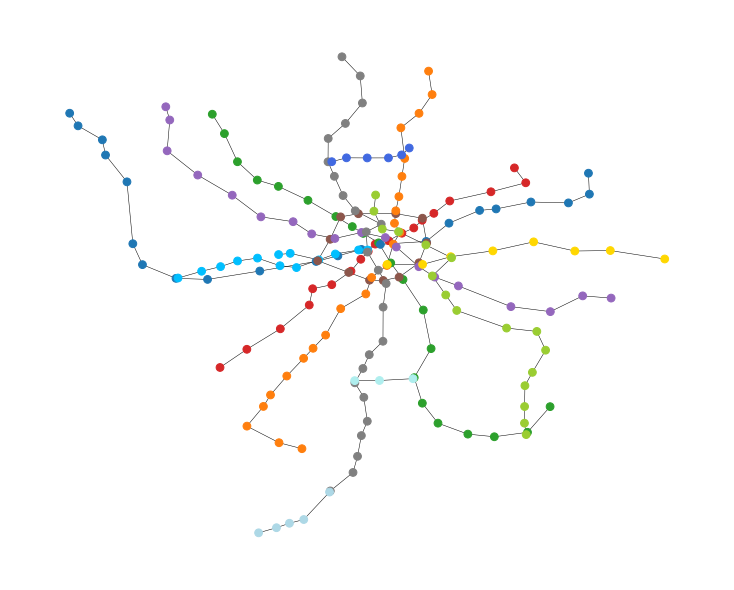

In [15]:
plt.figure(figsize=(10, 8))
nx.draw(
    G, 
    pos,
    width=0.5,
    node_color=list(nx.get_node_attributes(G, 'color').values()),
    node_size=60,
)
plt.show()

# Задание 2. Степень, близость, промежуточность (0 баллов)

Рассмотрим меры центральности графа станций метро. Во-первых, используйте networkx для вычисления degree, closeness, betweenness.

Напишите функцию centralities, которая берет граф G и возвращает словарь с ключами degree, closeness, betweenness. Значения представляют собой np.arrays со значениями каждой центральности.

In [16]:
def centralities(G: nx.Graph) -> Dict[str, np.array]:
    """
    Рассчитать degree, closeness, betweenness centralities графа
    
    :param G: Граф московского метро
    :return: сопоставление названий центральности (degree, closeness, betweenness) с np.array этих значений
    
    
    degree centrality: у кого больше связей, тот и важнее
    closeness centrality: чем центральнее узел (т.е. чем короче путь от него до всех остальных узлов), тем он важнее
    betweenness centrality: количество кратчайших путей, проходящих через узел
    """
    # YOUR CODE HERE
    
    dict_central = {'degree' : np.array(list(nx.degree_centrality(G).values())),
                   'closeness' : np.array(list(nx.closeness_centrality(G).values())),
                   'betweenness' : np.array(list(nx.betweenness_centrality(G).values()))}

    return dict_central

In [17]:
'''Проверить некоторые случайные значения центральностей'''
c = centralities(G)
assert c['degree'].shape[0] == 194
assert c['degree'][193] == 0.0051813471502590676
assert c['closeness'][94] == 0.12107904642409034
assert c['betweenness'][49] == 0.0991400402993669

Затем давайте создадим таблицу с 10 верхними узлами для каждой центральности.

Напишите функцию top10_centralities, которая берет граф G и возвращает словарь с ключами degree, closeness, betweenness. Значения pd.DataFrames со столбцами:
- station - название станции
- line - название линии
- centrality - значение центральности

Каждый кадр данных содержит 10 строк с наивысшими значениями центральности.

In [18]:
def top10_centralities(G: nx.Graph) -> Dict[str, pd.DataFrame]:
    """
    Создайте таблицу 10 лучших узлов по degree, closeness, betweenness centralities
    
    :param G: Граф московского метро
    :return: сопоставление имени станции с фреймом данных со столбцами (station, line, centrality)
    """
    # YOUR CODE HERE
    
    stations = []
    line = []
    
    for i in G:
        stations.append(G.nodes[i]['station_name'])
        line.append(G.nodes[i]['line_name'])

    degree = {'station' : stations, 
              'line' : line, 
              'centrality' : np.array(list(nx.degree_centrality(G).values()))}
    
    closeness = {'station' : stations, 
                 'line' : line, 
                 'centrality' : np.array(list(nx.closeness_centrality(G).values()))}
    
    betweenness = {'station' : stations, 
                   'line' : line, 
                   'centrality' : np.array(list(nx.betweenness_centrality(G).values()))}
    
    top_10 = {'degree' : pd.DataFrame(data = degree),
              'closeness' : pd.DataFrame(data = closeness),
              'betweenness' : pd.DataFrame(data = betweenness)}
        
    print(top_10.items())
    
    return top_10

In [19]:
'''Проверить, чтобы некоторые случайные узлы попали в топ-10 таблиц'''
top_dfs = top10_centralities(G)
assert 'Biblioteka imeni Lenina' in top_dfs['degree']['station'].to_list()
assert 'Serpuhovskaya' in top_dfs['betweenness']['station'].to_list()
assert 'Teatralnaya' in top_dfs['closeness']['station'].to_list()
assert 'Arbatsko-Pokrovskaya' in top_dfs['closeness']['line'].to_list()

dict_items([('degree',                          station             line  centrality
0           Bulvar Rokossovskogo  Sokolnicheskaya    0.005181
1                 Cherkizovskaya  Sokolnicheskaya    0.010363
2      Preobrazhenskaya ploschad  Sokolnicheskaya    0.010363
3                      Sokolniki  Sokolnicheskaya    0.010363
4                 Krasnoselskaya  Sokolnicheskaya    0.010363
..                           ...              ...         ...
189          Ulitsa Milashenkova         Monorels    0.010363
190                   Teletsentr         Monorels    0.010363
191    Ulitsa akademika Koroleva         Monorels    0.010363
192           Vystavochny tsentr         Monorels    0.015544
193  Ulitsa Sergeya Eyzenshteyna         Monorels    0.005181

[194 rows x 3 columns]), ('closeness',                          station             line  centrality
0           Bulvar Rokossovskogo  Sokolnicheskaya    0.075835
1                 Cherkizovskaya  Sokolnicheskaya    0.082023
2      

Следующий код выполняет визуализацию: для каждой центральности он печатает 10 лучших таблиц и графиков, где размер узла и цвет соответствуют значению центральности.

Degree centrality


,station,line,centrality
0,Bulvar Rokossovskogo,Sokolnicheskaya,0.005181
1,Cherkizovskaya,Sokolnicheskaya,0.010363
2,Preobrazhenskaya ploschad,Sokolnicheskaya,0.010363
3,Sokolniki,Sokolnicheskaya,0.010363
4,Krasnoselskaya,Sokolnicheskaya,0.010363
...,...,...,...
189,Ulitsa Milashenkova,Monorels,0.010363
190,Teletsentr,Monorels,0.010363
191,Ulitsa akademika Koroleva,Monorels,0.010363
192,Vystavochny tsentr,Monorels,0.015544


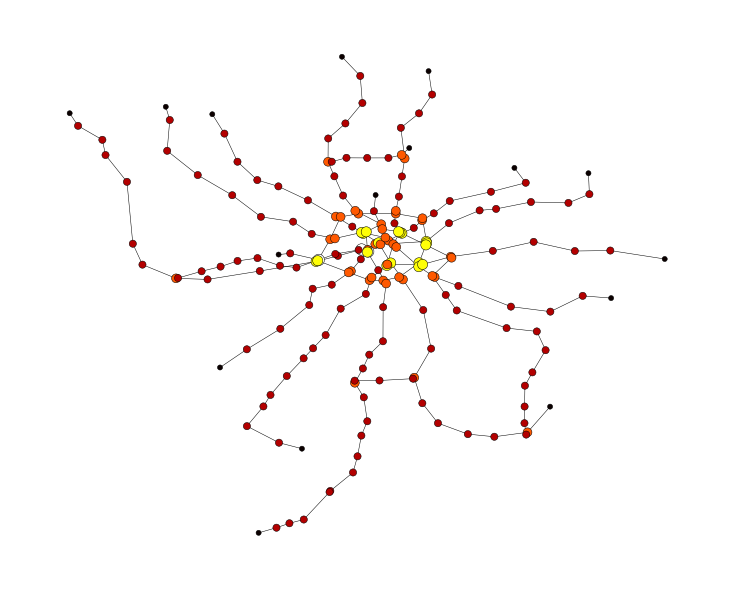

Closeness centrality


,station,line,centrality
0,Bulvar Rokossovskogo,Sokolnicheskaya,0.075835
1,Cherkizovskaya,Sokolnicheskaya,0.082023
2,Preobrazhenskaya ploschad,Sokolnicheskaya,0.089228
3,Sokolniki,Sokolnicheskaya,0.097722
4,Krasnoselskaya,Sokolnicheskaya,0.107881
...,...,...,...
189,Ulitsa Milashenkova,Monorels,0.081745
190,Teletsentr,Monorels,0.078233
191,Ulitsa akademika Koroleva,Monorels,0.079884
192,Vystavochny tsentr,Monorels,0.085664


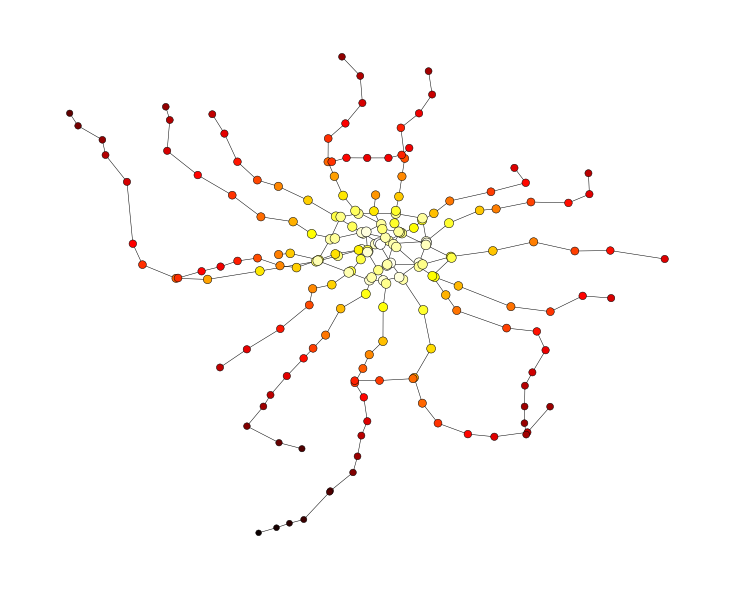

Betweenness centrality


,station,line,centrality
0,Bulvar Rokossovskogo,Sokolnicheskaya,0.000000
1,Cherkizovskaya,Sokolnicheskaya,0.010363
2,Preobrazhenskaya ploschad,Sokolnicheskaya,0.020617
3,Sokolniki,Sokolnicheskaya,0.030764
4,Krasnoselskaya,Sokolnicheskaya,0.040803
...,...,...,...
189,Ulitsa Milashenkova,Monorels,0.011018
190,Teletsentr,Monorels,0.006008
191,Ulitsa akademika Koroleva,Monorels,0.008806
192,Vystavochny tsentr,Monorels,0.026618


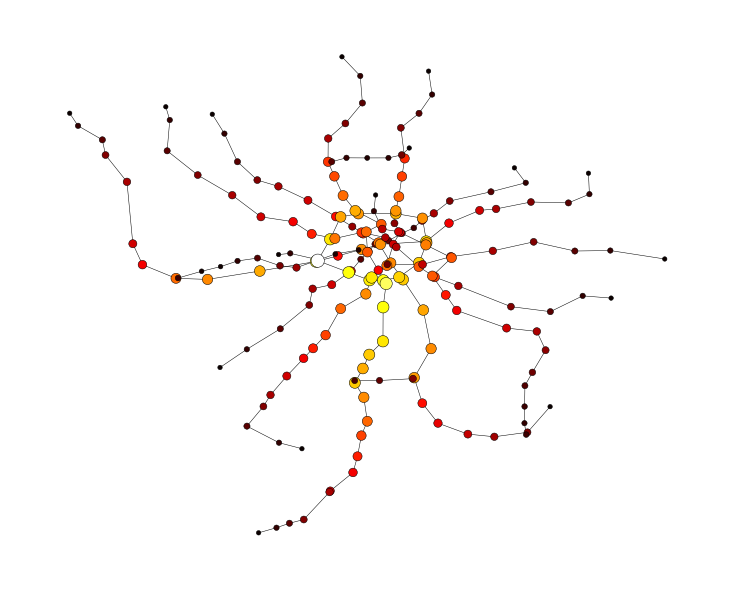

In [20]:
cases = [['degree', 5000, 0, 'Degree centrality'], 
         ['closeness', 700, 0, 'Closeness centrality'], 
         ['betweenness', 900, 20, 'Betweenness centrality']]
for c_key, scale, bias, title in cases:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize=(10, 8))
    nx.draw(G, 
            pos,
            width=0.5,
            linewidths=0.5,
            edgecolors='black',
            cmap=plt.cm.hot,
            node_size=c[c_key]*scale + bias,
            node_color=c[c_key])
    plt.show()

# Задание 3. Центр графа (0 баллов)

В следующем разделе мы немного изменим исходный граф — обрежем все станции, находящиеся за пределами Садового кольца. Садовое кольцо — район, включающий все станции Кольцевой линии, все станции радиальных линий, пересекающих Кольцевую линию, и все станции, находящиеся внутри круга.

Напишите функцию metro_graph_center, которая берет граф G и возвращает подграф со станциями внутри Садового кольца.

Подсказка: используйте centrality

In [21]:
def metro_graph_center(G: nx.Graph) -> nx.Graph:
    """
    Построить подграф со станциями внутри Садового кольца
    
    :param G: граф московского метро
    :return: подграф станций Московского метрополитена, расположенный внутри Садового кольца.
    """
    # YOUR CODE HERE

    q = nx.closeness_centrality(G) #centrality
    base = set([i 
                for i, j in q.items() 
                if j > 0.112]) #подбираем так, чтобы вся кольцевая вместилась. пихаем все в set, чтобы потом удалить лишнее
    subG = G.subgraph(base) #делаем подграф, сморим что выходит с помощью nx.draw(есть чуть ниже)
    
    remove = set([i 
                  for i, j in nx.degree(subG) 
                  if j == 1]) #посмотрев на граф, видим, что большая часть лишних узлов просто конечная линия
                              #без продолжения и связей, это значит, что степень узлов равна 1.
                              #пихаем все в set, чтобы получилось удалить их.
    base -= remove #удаляем узлы со степенью 1
#     subG = G.subgraph(base) #обновляем подграф и видим, что удалилось не все, т.к. не все лишнии узлы были без связей.
                              #отрисовав граф, можно увидеть названия станций, которые не входят в колцо
    remove_two = set([i 
                      for i in G.nodes 
                      if G.nodes[i]['station_name'] == 'Ploschad Ilicha' or 
                      G.nodes[i]['station_name'] == 'Rimskaya' or
                      G.nodes[i]['station_name'] == 'Krestyanskaya zastava' or
                      G.nodes[i]['station_name'] == 'Proletarskaya']) #ищем id лишних узлов по названию станций, которые
                                                                      #можем наблюдать на графе. пихаем все в set, чтобы 
                                                                      #можно было удалить.
    base -= remove_two #удаляем оставшиеся лишние узлы    
    subG = G.subgraph(base) #обновляем подграф
    
    print(subG)
    
#     plt.figure(figsize=(10, 8))
#     nx.draw(subG, 
#             pos,
#             width=0.5,
#             node_color=list(nx.get_node_attributes(subG, 'color').values()),
#             labels=nx.get_node_attributes(subG, 'station_name'),
#             font_size=10)  #рисуем подграф, для проверок
    
    return subG

In [22]:
'''Проверка количества узлов и ребер и некоторых случайных станций'''
subG = metro_graph_center(G)
assert len(subG.nodes) == 57
assert len(subG.edges) == 85
assert 149 in list(subG.nodes)
assert 82 in list(subG.nodes)
assert 137 in list(subG.nodes)

Graph with 57 nodes and 85 edges


Нарисуем центр графика метро с названиями станций и цветами.

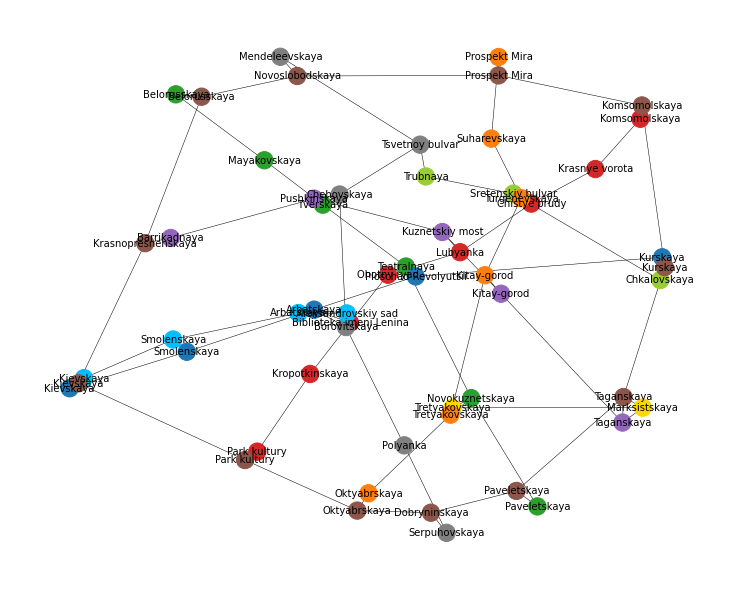

In [23]:
plt.figure(figsize=(10, 8))
nx.draw(subG, 
        pos,
        width=0.5,
        node_color=list(nx.get_node_attributes(subG, 'color').values()),
        labels=nx.get_node_attributes(subG, 'station_name'),
        font_size=10)
plt.show()

# Задание 4. Централизация центральности (3 балла)

Центр метрографа немного похож на круговой график. Мы видим, что круговой граф имеет наименьшую централизацию с тех пор, как

$${Centralization} = \frac{\sum_i^N[C_x(p_*) - C_x(p_i)]}{\max\sum_i^N[C_x(p_*) - C_x(p_i)]}$$

где
- $C_x$ - некоторая мера центральности
- $p_i$ - $i$-й узел
- $p_*$ - узел с наибольшим значением центральности
- $\max$ - максимальный среди всех возможных графов с одинаковым количеством узлов (звездный граф для степени, промежуточности, центральности близости).

Проверим, как изменится централизация при преобразовании нашего усеченного графа в чисто круговой граф.

Напишите функцию centralization_seq, которая берет усеченный граф G и удаляет станции, кроме Кольцевой, одну за другой в порядке возрастания идентификаторов узлов (т. е. результат отсортированной функции). На каждом шаге после удаления вычисляется централизация. Функция возвращает кортеж:
- словарь, где ключами являются degree, closeness, betweenness, а значения - np.arrays со значениями централизации
- список упорядоченно удаленных узлов

In [24]:
def centralization(values, deg_closs_btw):
    max_val = max(values)
    all_val = [max_val - i for i in values]
    
    star = nx.star_graph(len(values) - 1)
    
    
    def denominator(star_central_x):
        return np.sum([star_central_x[0] - star_central_x[i] for i in range(len(values))])
    
    
    if deg_closs_btw == 'deg':
        star_centrality = nx.degree_centrality(star)
        return sum(all_val)/ denominator(star_centrality)
    
    elif deg_closs_btw == 'closs':
        star_centrality = nx.closeness_centrality(star)
        return sum(all_val)/ denominator(star_centrality)
    
    elif deg_closs_btw == 'btw':
        star_centrality = nx.betweenness_centrality(star)
        return sum(all_val)/ denominator(star_centrality)

    
    

def centralization_seq(G: nx.Graph) -> (Dict[str, np.array], List[str]):
    # YOUR CODE HERE
    
    cop = G.copy()
    Dic = {} #словарь, где будут значения централизации
    
    Lis = [i 
           for i in cop.nodes
           if cop.nodes[i]['line_name'] != 'Koltsevaya'] #список улов, которые нужно удалить
    
    Lis = sorted(Lis) #сортируем в порядке возрастания (по условию)
    
    degree = []
    closs = []
    btw = []
    #удаляем станции, кроме Кольцевой, одну за другой, в порядке возрастания id узлов. 
    #На каждом шаге после удаления - вычисляется централизация.
    for i in Lis: 
        cop.remove_node(i) #каждый шаг в порядке возрастания удаляем лишний узел
        
        subgToDic = G.subgraph(cop)    

        degree.append(centralization(nx.degree_centrality(subgToDic).values(), 'deg'))
        closs.append(centralization(nx.closeness_centrality(subgToDic).values(), 'closs'))
        btw.append(centralization(nx.betweenness_centrality(subgToDic).values(), 'btw'))
    

    Dic['degree'] = np.array(degree)
    Dic['closeness'] = np.array(closs)
    Dic['betweenness'] = np.array(btw)
    
    print(len(Lis))    
    print(Dic)

    subG = G.subgraph(Lis)    
    Dict_List = (Dic, Lis)
    
    plt.figure(figsize=(10, 8))
    nx.draw(subG, 
            pos,
            width=0.5,
            node_color=list(nx.get_node_attributes(subG, 'color').values()),
            labels=nx.get_node_attributes(subG, 'station_name'),
            font_size=10)
    plt.show()
    
    return Dict_List

45
{'degree': array([0.03838384, 0.03878407, 0.04063861, 0.0418552 , 0.04313725,
       0.02530612, 0.0255102 , 0.02570922, 0.02682701, 0.02705314,
       0.02929293, 0.03065539, 0.03322259, 0.03368177, 0.03658537,
       0.03717949, 0.04048583, 0.04125178, 0.04354354, 0.04603175,
       0.04705882, 0.04812834, 0.04734848, 0.05040323, 0.0516129 ,
       0.05517241, 0.0591133 , 0.06349206, 0.06552707, 0.07076923,
       0.07666667, 0.07971014, 0.08300395, 0.04112554, 0.04761905,
       0.04473684, 0.05263158, 0.0620915 , 0.06617647, 0.07083333,
       0.07619048, 0.08241758, 0.08974359, 0.09848485, 0.        ]), 'closeness': array([0.10921369, 0.10800095, 0.11108788, 0.10796209, 0.09533765,
       0.08574017, 0.08968803, 0.09399501, 0.0892264 , 0.08144931,
       0.07099039, 0.07851816, 0.07901603, 0.07260809, 0.08400531,
       0.07616329, 0.06502555, 0.06210063, 0.05931641, 0.09965317,
       0.09392489, 0.08616155, 0.07352958, 0.08011791, 0.08306483,
       0.09803068, 0.10053234, 0.

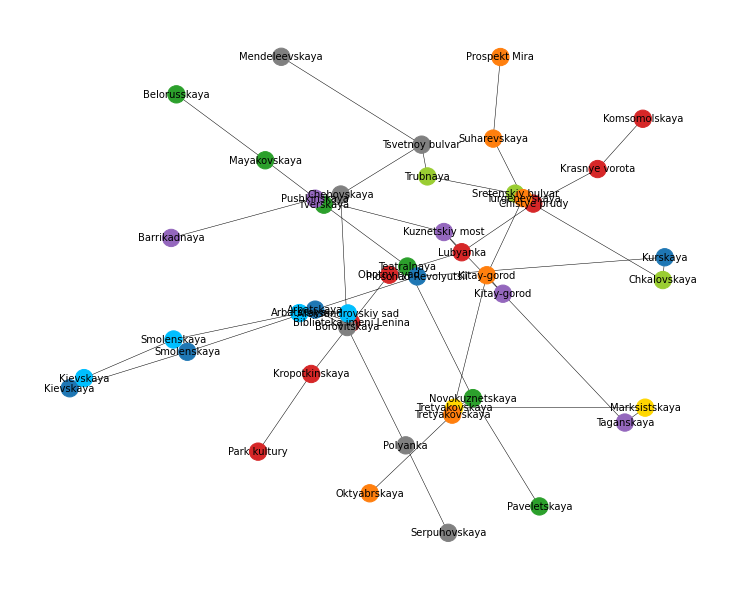

In [25]:
'''Проверьте форму вывода и некоторые случайные значения централизации'''
cent, order = centralization_seq(subG)
assert len(order) == 45
assert order[0] == 5
assert order[-1] == 167
assert cent['degree'].shape == (45,)
assert cent['closeness'].shape == (45,)
assert cent['betweenness'].shape == (45,)
assert cent['degree'][-1] == cent['betweenness'][-1] == cent['closeness'][-1]
assert cent['degree'][41].round(4) == 0.0824
assert cent['degree'][2].round(4) == 0.0406
assert cent['closeness'][11].round(4) == 0.0785
assert cent['closeness'][9].round(4) == 0.0814
assert cent['betweenness'][14].round(4) == 0.1178

Нарисуем, как меняется централизация при стремлении графа к круговому.

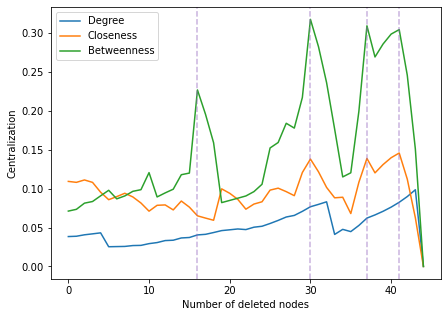

In [26]:
plt.figure(figsize=(7, 5))
plt.plot(cent['degree'], label='Degree')
plt.plot(cent['closeness'], label='Closeness')
plt.plot(cent['betweenness'], label='Betweenness')
plt.ylabel('Centralization')
plt.xlabel('Number of deleted nodes')
plt.axvline(16, linestyle='--', color='C4', alpha=0.5)
plt.axvline(30, linestyle='--', color='C4', alpha=0.5)
plt.axvline(37, linestyle='--', color='C4', alpha=0.5)
plt.axvline(41, linestyle='--', color='C4', alpha=0.5)
plt.legend()
plt.show()

Мы можем видеть значительные пики централизации посредничества. Более высокая централизация означает, что измерения центральности неравномерно распределены по узлам. Центральность промежуточности для конкретного узла указывает, сколько кратчайших путей проходит через этот узел. Пики сигнализируют о том, что мы ломаем некоторые кратчайшие пути после удаления узла, поэтому новые кратчайшие пути должны проходить через небольшое количество определенных узлов. Давайте визуализируем график до и после удаления узла под индексом 37 (Цветной бульвар), чтобы понять этот эффект.

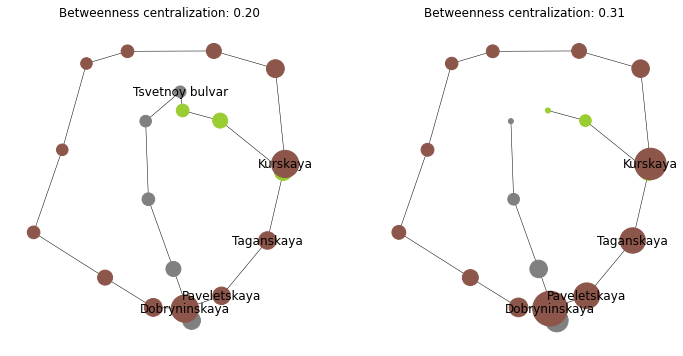

In [27]:
plt.figure(figsize=(12, 6))
cases = [[36, [147, 77, 78, 79, 80]], [37, [77, 78, 79, 80]]]
station_names = nx.get_node_attributes(subG, 'station_name')
for i, (node_id, stations) in enumerate(cases):
    plt.subplot(1, 2, i+1)
    s = subG.copy()
    s.remove_nodes_from(order[:node_id + 1])
    betw = nx.betweenness_centrality(s)
    nx.draw(
        s,
        pos,
        width=0.5,
        node_color=list(nx.get_node_attributes(s, 'color').values()),
        node_size=[(j*60 + 5)**2 for i, j in betw.items()],
        labels={n:v for n, v in station_names.items() if n in stations})
    plt.title('Betweenness centralization: {:.2f}'.format(cent['betweenness'][node_id]))

Цветной бульвар — узел, подлежащий удалению на следующем шаге. Размер узла определяется промежуточностью. На первом графике мы видим, что существует цикл серой и светло-зеленой линии, поэтому все узлы на этих линиях могут легко получить доступ друг к другу по кратчайшему пути. Однако после удаления Цветного бульвара цикл нарушается. Так, чтобы соединить станции между серой и светло-зеленой линиями, необходимо пройти через пересечение линии с Кольцевой и несколькими станциями на ней. Это повышает значение центральности между ними для таких узлов (например, Добрынинская, Павелецкая, Таганская, Курская), сохраняя старые значения для остальной части графа. Это приводит к увеличению общей централизации графа для центральности между.

# Задание 5. Центральность Каца (3 балла)

Центральность Каца основана на количестве проходов (путь, который может содержать повторяющиеся узлы), проходящих через узел. Кстати, как быстро посчитать общее количество переходов фиксированной длины между двумя узлами?

Напишите функцию number_of_walks, которая принимает граф G, узлы i, j и длину пути n. Функция возвращает количество путей.

In [28]:
def number_of_walks(G: nx.Graph, i: int, j: int, n: int) -> int:
    """
    Подсчитать количество путей длины n    
    
    :param G: граф московского метро внутри Садового кольца
    :param i: начальный узел путей
    :param j: target узел путей
    :param n: размер пути
    :return: количество путей между входными узлами размера n
    """
    # YOUR CODE HERE
    
    #задача сводится к возведению матрицы в степень
    #https://e-maxx.ru/algo/fixed_length_paths
    
    adj_matrx = nx.adjacency_matrix(G) #матрица смежности
    adj_matrx = adj_matrx.todense() #todense возвращает плотное матричное представление
                                      # *Если бо́льшая часть элементов матрицы ненулевые, матрица считается плотной.
    dense_matrx_degree = adj_matrx ** n #возводим матрицу в степень
    
    roads = np.array(dense_matrx_degree) #матрица по которой будем определять кол-во путей 
    num_id_nodes = {list(G.nodes)[i] : i for i in range(len(G))} #список где у каждого узла свой id(по порядку)
    
    print(roads[num_id_nodes[i]][num_id_nodes[j]])

    return roads[num_id_nodes[i]][num_id_nodes[j]]

In [29]:
'''Проверьте некоторые пути в центре города'''
# Павелецкая (Кольцевая) - Охотный ряд. Длина 4
# Одиночный путь: Павелецкая (Кольцевая) -> Павелецкая (Замоскворецкая) -> Новокузнецкая -> Театральная -> Охотный ряд
assert number_of_walks(subG, 78, 9, 4) == 1

# Новослободская - Пушкинская. Длина 4
# 1-й путь: Новослободская -> Белорусская -> Краснопресненская -> Баррикадная -> Пушкинская
# 2-й путь: Новослободская -> Менделеевская -> Цветной бульвар -> Чеховская -> Пушкинская
assert number_of_walks(subG, 83, 120, 4) == 2

# Новослободская - Пушкинская. Длина 7. Много путей.
assert number_of_walks(subG, 83, 120, 7) == 31

1
2
31


Теперь мы можем применить аналогичный подход к вычислению центральности по Кацу. Формула:
$$k_i = \beta\sum_j A_{ij} + \beta^2\sum_j A_{ij}^2 + \beta^3\sum_j A_{ij}^3 + \dots$$<br>
где $\beta$ является коэффициентом затухания с ограничением 
$$\beta < \frac{1}{\lambda}$$<br>
где $\lambda$ является наибольшим собственным значением матрицы $А$

Напишите функцию katz_centrality, которая принимает граф G, число итераций n, коэффициент затухания бета и возвращает np.array значений центральности.

In [30]:
def katz_centrality(G: nx.Graph, n: int, beta: float) -> np.array:
    """
    Вычислить центральность Каца
    
    :param G: граф московского метро
    :param n: количество итераций в вычислении центральности Каца
    :param beta: коэффициент затухания
    :return: массив значений центральности для каждого узла
    """
    # YOUR CODE HERE

    lambda_ = max(nx.adjacency_spectrum(G)) # Возвращает собственные значения матрицы смежности G.
                                            # lambda является наибольшим собственным значением матрицы
    
    if beta >= 1/lambda_: # beta является коэффициентом затухания с ограничением  
        raise AssertionError
        
    mtrx_A = nx.to_numpy_array(G)
    
    katz = 0
    for i in range(1, n+1): # количество итераций в вычислении центральности Каца
                            # начинается с 1, т.к. i испольузем в качестве степени
        katz += beta ** i * np.sum(np.linalg.matrix_power(mtrx_A, i), axis = 1) #вычисляем центральность по Кацу
        
#     print(katz)

    return katz

In [31]:
'''Проверьте ограничение на бета-версию и реализацию networkx'''
beta = 1 / 3
try:
    katz = katz_centrality(G, 1, beta)
except:
    pass
else:
    raise AssertionError("Did not raise an exception")
beta = 1 / 5
assert 0.9999 < np.corrcoef(katz_centrality(G, 1, beta), c['degree'])[0][1] <= 1
nxkatz = np.array([val for val in nx.katz_centrality(G, beta).values()])
assert 0.9999 < np.corrcoef(katz_centrality(G, 20, beta), nxkatz)[0][1] <= 1

Нарисуем граф с визуализацией центральности Каца.

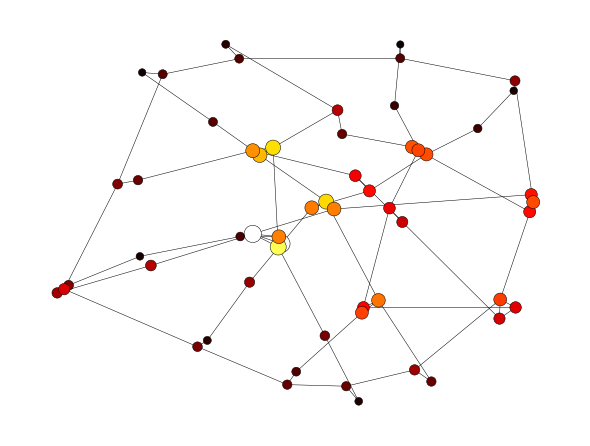

In [32]:
katz_c = katz_centrality(subG, 20, 1/4)
katz_c = katz_c / katz_c.max()
plt.figure(figsize=(8, 6))
nx.draw(subG, 
        pos,
        width=0.5,
        linewidths=0.5,
        edgecolors='black',
        cmap=plt.cm.hot,
        node_size=katz_c*300,
        node_color=katz_c)
plt.show()

Здесь мы можем видеть, как центральность Каца сходится по количеству итераций.

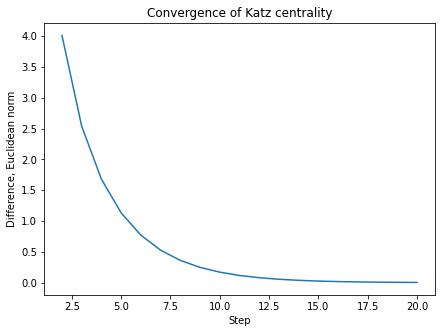

In [33]:
plt.figure(figsize=(7, 5))
convergence = []
old_katz = katz_centrality(G, 1, 0.2)
step_space = np.arange(2, 21)
for i in step_space:
    katz = katz_centrality(G, i, 0.2)
    convergence.append(np.linalg.norm(katz - old_katz))
    old_katz = katz.copy()
plt.plot(step_space, convergence)
plt.ylabel('Difference, Euclidean norm')
plt.xlabel('Step')
plt.title('Convergence of Katz centrality')
plt.show()

# Задача 6. Центральность собственного вектора (3 балла)

Реализуем центральность собственного вектора, которую можно интерпретировать как влияние узла. Значение центральности узла учитывает значения центральности его соседей, то есть
$$v_i = \frac{1}{\lambda}\sum_j A_{ij} v_j$$<br>
или в матричной форме
$$Av = \lambda v$$<br>
где $\lambda$ - наибольшее собственное значение<br>
$A$ - матрица смежности графа<br>
$v$ - собственный вектор (мера центральности)

Нормализованная оценка престижа собственного вектора
$$p(v) = \sum_u N^{T}(v, u) \cdot p(u)$$

Напишите функцию eigenvector_centrality, которая принимает матрицу смежности A и возвращает np.array с неотрицательными (положительными) знаечниями централизации.

In [34]:
def eigenvector_centrality(A: np.array) -> np.array:
    """
    Вычислить центральность собственного вектора
    
    :param A: матрица смежности графа
    :return: массив центральностей собственных векторов
    """
    # YOUR CODE HERE
            
    vector = np.array([1] * A.shape[0])
    
    for iterator in range(1000):
        vector = np.dot(A.T, vector)
        vector = vector / np.linalg.norm(vector) 
        
    return np.array(vector)

In [35]:
'''Проверьте некоторые случайные значения'''
eig_c = eigenvector_centrality(nx.to_numpy_array(G))
assert np.all(eig_c > 0)
eig_c = eigenvector_centrality(nx.to_numpy_array(subG))
assert np.all(eig_c > 0)
assert eig_c.shape == (57, )
assert eig_c[0].round(4) == 0.0244
assert eig_c[-1].round(4) == 0.0701
assert eig_c[25].round(4) == 0.1198

Нарисуем граф с визуализацией центральности собственного вектора.

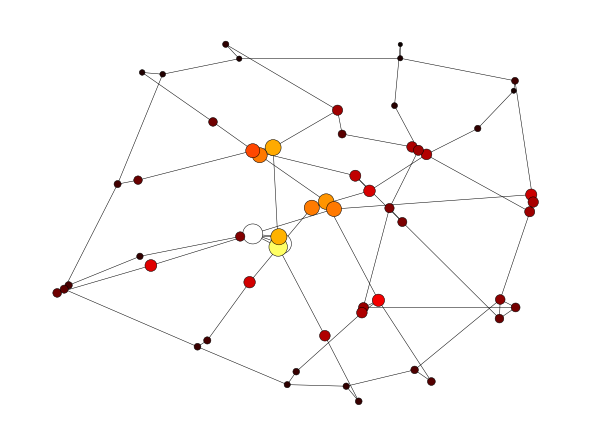

In [36]:
plt.figure(figsize=(8, 6))
nx.draw(subG, 
        pos,
        width=0.5,
        linewidths=0.5,
        edgecolors='black',
        cmap=plt.cm.hot,
        node_size=eig_c/eig_c.max()*400,
        node_color=eig_c)
plt.show()

# Задание 7. Корреляция центральности (1 балл)

Наконец, давайте посмотрим на отношения между центральностями. Рассчитайте коэффициент корреляции Пирсона, а затем построим графики разброса по парам центральностей.<br>
Напишите функцию pearson_correlation, которая принимает два массива np.array и возвращает коэффициент корреляции Person.

In [37]:
def pearson_correlation(i_vals: np.array, j_vals: np.array) -> float:
    """
    Выислите коэффициент корреляции Пирсона
    
    :param i_vals: массив централизаций
    :param j_vals: массив централизаций 
    :return: корреляция пирсона
    """
    # YOUR CODE HERE
    
    from scipy import stats
        
    print(round(stats.pearsonr(i_vals, j_vals)[0], 4))
    return round(stats.pearsonr(i_vals, j_vals)[0], 4)

In [38]:
'''Проверьте некоторые коэффициенты'''
centvals = [
    ('Degree', list(nx.degree_centrality(G).values())),
    ('Closeness', list(nx.closeness_centrality(G).values())),
    ('Betweenness', list(nx.betweenness_centrality(G).values())),
    ('Katz', katz_centrality(G, 20, 1/5)), 
    ('Eigenvector', eigenvector_centrality(nx.to_numpy_array(G)))
]
assert pearson_correlation(centvals[0][1], centvals[0][1]) == 1
assert round(pearson_correlation(centvals[4][1], centvals[2][1]), 4) == 0.3358
assert round(pearson_correlation(centvals[4][1], centvals[3][1]), 4) == 0.9169
assert round(pearson_correlation(centvals[0][1], centvals[1][1]), 4) == 0.7211
assert round(pearson_correlation(centvals[3][1], centvals[4][1]), 4) == 0.9169

1.0
0.3358
0.9169
0.7211
0.9169


0.7211
0.5867
0.9356
0.7679
0.6428
0.8081
0.7127
0.5251
0.3358
0.9169


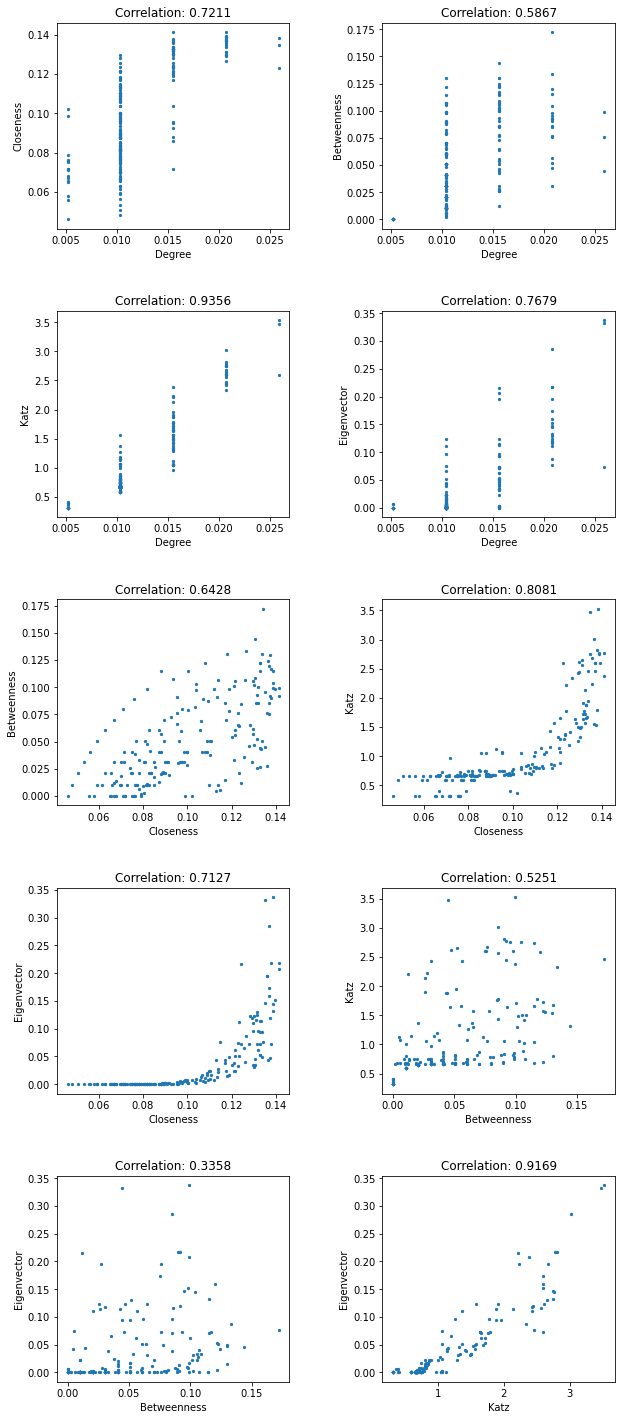

In [39]:
plt.figure(figsize=(2*5, 5*5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
k = 1
for i in range(len(centvals)):
    for j in range(i + 1, len(centvals)):
        i_label, i_vals = centvals[i]
        j_label, j_vals = centvals[j]
        correlation = pearson_correlation(i_vals, j_vals)
        plt.subplot(5, 2, k)
        plt.scatter(i_vals, j_vals, s=5)
        plt.title('Correlation: {:.4f}'.format(correlation))
        plt.xlabel(i_label)
        plt.ylabel(j_label)
        k += 1